# Analyse de texte avec NLTK

NLTK est la boîte à outil pour le traitement du langage en python. Elle regroupe la plupart des fonctions utiles à la découverte de cette discipline. 

Ce TP constitue une introduction à NLTK par le biais de fonctions à trou, parfois simples, parfois plus complexes. Il est bon de chercher, mais n'hésitez pas à poser des questions si vous rencontrez des problèmes et que vous restez bloqué trop longtemps !  

Les textes présents lors de ce TP sont issus du projet Gutenberg, il s'agit d'ebooks gratuits que vous pouvez télécharger. Nous allons nous concentrer sur quelques exemples en français.

https://www.gutenberg.org/ebooks/search/?query=.

Dans ce notebook, vous allez trouver du code à trou sous cette forme : 
```python
## ----- TODO : L'objectif est de remplir le code entre les deux lignes de commentaires ----- ##
## ------------------------------------------------------------------------------------------ ##
```

Le code à trou n'est qu'une proposition pour arriver au résultat. Il n'y a pas forcément de "meilleure" solution, donc libre à vous de proposer une implémentation différente si vous le souhaitez :).

Nous allons explorer un peu plus les fonctions présentes dans NLTK.

Commencez dans un premier temps par recharger le texte, uniquement de Alice, de la même manière qu'au TP précedent.

## Étape 1 : Récupération du texte

Dans le dossier `data` à la racine du projet, vous trouverez quelques textes issus du projet gutenberg avec lesquels nous allons pouvoir travailler.

La première étape consiste à lire ces texte et les concatener dans une variable python.

In [39]:
import glob

text = ""

for filepath in glob.glob("../data/fr_alice*.txt"):
    with open(filepath, encoding='utf-8') as file:
        text += file.read()
        text += "\n"

assert "Le Chat grimaça en apercevant Alice" in text, "Vous devez charger le contenu du livre dans la variable."

## Étape 2 : Exemple d'utilisations des différentes fonctions

Parmi les fonctions de base :

  - Tokenize découpe le texte en tokens mots/sentence selon la fonction utilisée
  - Stopwords contient la liste des mots trop courants pour être analysés
  - Collocation donne la liste des mots qui ont des liens entre eux
  
Il y a également d'autres fonctions qui permettent de visualiser le texte.

In [40]:
import nltk
from nltk import word_tokenize

# Tokenization
tokens = word_tokenize(text)
print("tokens subset : %s" % tokens[:20])
alpha_tokens = [token for token in tokens if token.isalpha()]
print("alpha_tokens subset : %s" % alpha_tokens[:20])

nltk_text = nltk.Text(tokens)
nltk_text

tokens subset : ['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Aventures', "d'Alice", 'au', 'pays', 'des', 'merveilles', ',', 'by', 'Lewis', 'Carroll', 'This', 'eBook', 'is', 'for', 'the']
alpha_tokens subset : ['Project', 'Gutenberg', 'EBook', 'of', 'Aventures', 'au', 'pays', 'des', 'merveilles', 'by', 'Lewis', 'Carroll', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


<Text: ﻿The Project Gutenberg EBook of Aventures d'Alice au...>

In [41]:
# Collocations
nltk.download('stopwords')
print("Stopwords : %s" % nltk.corpus.stopwords.words('french'))
print("Collocations : %s" % str(nltk_text.collocations()))

Stopwords : ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rqueraud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Observer l'utilisation du mot "lapin"
nltk_text.concordance("lapin")

Displaying 25 of 52 matches:
SE COCASSE . 29 IV . L'HABITATION DU LAPIN BLANC . 41 V. CONSEILS D'UNE CHENILL
ir les fleurs , quand tout à coup un lapin blanc aux yeux roses passa près d'el
-extraordinaire d'entendre parler le Lapin qui se disait : `` Ah ! j'arriverai 
out naturel . ) Cependant , quand le Lapin vint à tirer une montre de son gouss
e idée que jamais elle n'avait vu de lapin avec un gousset et une montre . Entr
près , Alice était à la poursuite du Lapin dans le terrier , sans songer commen
it devant elle un long passage et le Lapin Blanc qui court à toutes jambes . Il
 tout juste à temps pour entendre le Lapin dire , tandis qu'il tourne le coin :
 deux pas : mais le coin tourné , le Lapin avait disparu . Elle se trouva alors
our voir ce que c'était . C'était le Lapin Blanc , en grande toilette , tenant 
s au premier venu ; ainsi , quand le Lapin fut près d'elle , elle lui dit d'une
 Je vous en prie , Monsieur -- '' Le Lapin tressaillit d'épouvante , laissa tom
lle avait m

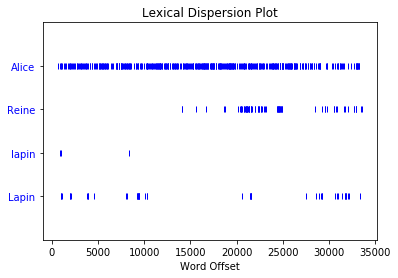

In [63]:
# Observer la dispersion d'un mot au cours d'un texte
nltk_text.dispersion_plot(["Alice", "Reine", "lapin", "Lapin"])

In [43]:
# Distributions de mots
fdist = nltk_text.vocab()
print("Nombre de fois où le mot `Alice` est présent : %d" % fdist["Alice"])

# Nombre de mots
print("Nombre de mots : %d" % len(tokens))
print("Nombre de mots uniques : %d" % len(fdist.keys()))

# Stopwords
print(nltk.corpus.stopwords.words('french'))

# Mots les plus présents
print("Mots les plus présents : %s" % str(fdist.most_common(10)))

Nombre de fois où le mot `Alice` est présent : 371
Nombre de mots : 37159
Nombre de mots uniques : 5288
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', '

## Étape 3 : Exercice

Pour s'entrainer avec tout ça, on va constuire une fonction qui, à partir d'un texte brut, va afficher les mots (donc pas des ponctuations) les plus présents du texte qui ne sont pas des stopwords. 

In [47]:
## ----- TODO : Afficher les 10 mots les plus présents qui ne sont pas des mots communs français et qui ne sont pas des ponctuations ----- ##
def most_common_non_stopwords(raw_text, number=10):
    pass
## --------------------------------------------------------------------------------------------------------------------------------------- ##
print("Subset des mots les plus présents non stopwords/ponctuation : %s" % str(most_common_non_stopwords(text)[:20]))
assert("Alice" in most_common_non_stopwords(text))

Subset des mots les plus présents non stopwords/ponctuation : ['dit', 'Alice', 'les', 'tout', 'bien', 'the', 'a', 'si', 'cela', 'of']


Une fois que vous avez réussi cette fonction, nous pouvons passer à la génération de texte !